# Full Pipeline Test
This section tests the Full Pipeline - which runs on a single participant's data.

The process is as follows:
1. Use helper function, [generate_random_test_points](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.tools.generate_random_test_points), to generate actual and test coordinates.
2. Create a [ParticipantData](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.data_structures.ParticipantData) object populated with a list containing a single [TrialData](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.data_structures.TrialData) object (i.e. one participant with one trial).
3. Create an [AnalysisConfiguration](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.data_structures.AnalysisConfiguration) object which contains the configuration information for how the analysis should be run.
4. Call the [full_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.full_pipeline.full_pipeline) function with the data and configuration and ask it to visualize the result.

This process could then be run in a loop if desired over any data of interest, however, as will be shown in the next section, the [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) function provides a variety of functionality to make this largely unnecessary.

Note: If you've never used Jupyter Notebooks before, please see the [Jupyter/IPython Notebook Quick Start Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/).

In [19]:
pwd

'/Users/martin/Desktop/Rokmetro/msl3114/examples'

In [20]:
import sys
sys.path.insert(0, '..')

In [21]:
import cogrecon.core.data_structures

In [22]:
# Import the library functions we're using
from cogrecon.core.full_pipeline import full_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
from cogrecon.core.tools import generate_random_test_points
# Set up visualization via matplotlib
%matplotlib inline

2023-08-11 16:24:51 Yuanruis-MBP root[64981] INFO ['test', -1] : The transformation function did not reduce the error, removing rotation and retying (old_error=0.7942660358486031, new_error=0.799070835123886).


Original Misplacement: 0.5365417784995208
Original Swap: 1.0
Original Edge Resizing: 0.23906706094077798
Original Edge Distortion: 1.3
Axis Swap Pairs: [[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 0.8327834691571397
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 0.33833842363668487
Raw Deanonymized Misplacement: 0.15885320716972062
Post-Deanonymized Misplacement: 0.15885320716972062
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 0.9252283766098616
Translation Magnitude: 0.04428704695422655
Translation: [0.0405268126423069, -0.017858330968520575]
TranslationX: 0.0405268126423069
TranslationY: -0.017858330968520575
Geometric Distance Threshold: 0.33833842363668487
Post-Transform Misplacement: 0.15151766010215234
N

/Users/martin/Desktop/Rokmetro/msl3114/examples/../cogrecon/core/visualization/vis_iposition.py:146: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, update, interval=(float(animation_duration) / float(animation_ticks)) * 1000,
/Users/martin/Desktop/Rokmetro/msl3114/examples/../cogrecon/core/visualization/vis_iposition.py:163: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


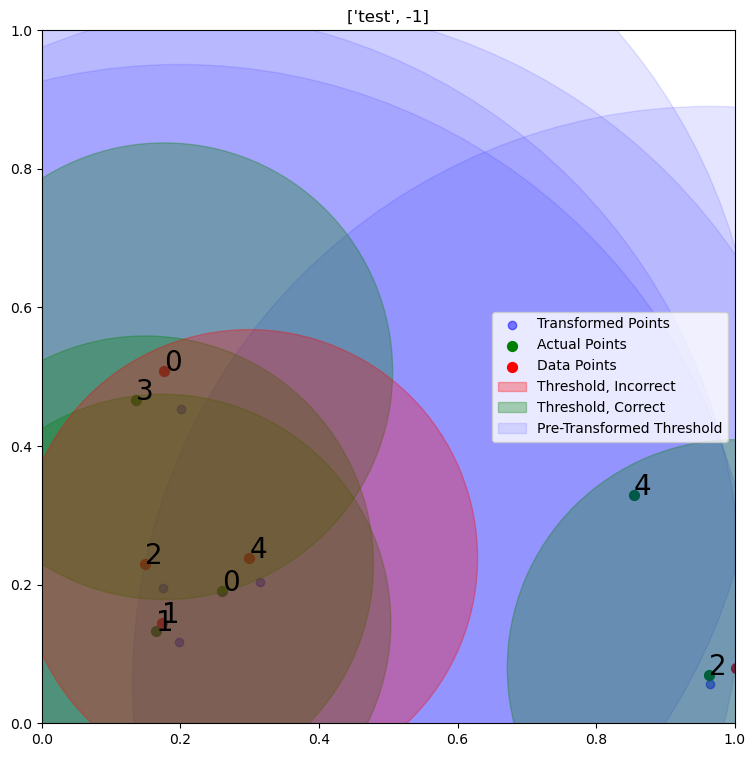

In [23]:
# Test with random points
actual_coordinates, data_coordinates = generate_random_test_points()
data = ParticipantData([TrialData(actual_coordinates, data_coordinates)])
config = AnalysisConfiguration(debug_labels=['test', -1])
result = full_pipeline(data, config, visualize=True, visualization_extent=[[0., 1.], [0., 1.]])

In [12]:
data_coordinates

[[0.33307177882553174, 0.4564867173385277],
 [0.7862975787744896, 0.2550911100907123],
 [0.8505018554087771, 0.6958673212074055],
 [0.2220328869232412, 0.4689345278883457],
 [1.0036089566803814, 0.9716328223941331]]

In [13]:
actual_coordinates

[[0.9927413437087701, 0.9515935334938341],
 [0.3223450702901389, 0.4265223289418517],
 [0.7587765295237666, 0.21980281106344468],
 [0.2105783412279496, 0.42424926023270404],
 [0.8450529005374299, 0.7704933418999604]]

# Batch Pipeline Test
This section tests the Batch Pipeline, which runs on a folder full of data files, automatically finding the appropriate files. The process is as follows:
1. Produce a UI window for selection of a directory.
2. Once a valid directory has been selected, run the [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) command on the directory.

Note that the [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) function has a variety of options to make locating and processing large groups of files easier. Some of the more critical inputs are:
* **trial_by_trial_accuracy** - if *True*, the accuracy windows are calculated on individual trials; otherwise, the accuracy windows are computed using the entire participant's data at once (this is generally preferred and is default)
* **collapse_trials** - if *True*, one row per participant will be produced in the output; otherwise, each trial will get its own row (note that this does not impact whether or not the accuracy is being computed on a per-trial or per-participant basis)
* **removal_dim_indicies** - this parameter takes a list of dimension indicies which will be excluded from the analysis (i.e. if the data is 3D, and only the first and third dimensions should be analyzed, the input could be *removal_dim_indicies=[1]*)
* **actual_coordinate_prefixes** - if *True*, it is assumed that there will be a *\*actual_coordinates.txt* file for every *\*position_data_coordinates.txt* file; otherwise, only one *actual_coordinates.txt* file is expected
* **\_data_coodinates_file_suffix**, **\_actual_coordinates_file_suffix** - these provide the search string for finding files of each type (i.e. *position_data_coordinates.txt* and *actual_coordinates.txt*)

Note: The [batch_pipeline](https://msl-iposition-pipeline.readthedocs.io/en/latest/source/cogrecon.core.html#cogrecon.core.batch_pipeline.batch_pipeline) function can produce a significant number of logged outputs (mostly warnings about transformation functions). These outputs are generated via the [logging](https://docs.python.org/2/howto/logging.html#) library, and they can be supressed by uncommenting the following lines from the import cell:

    import logging
    logging.disable(logging.WARNING)
    
Note 2: Sometimes, the easygui.diropenbox prompt appears behind other active windows. Use ALT+TAB to easily find the window.

In [6]:
from cogrecon.core.batch_pipeline import batch_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
import os, datetime, easygui
# import logging
# logging.disable(logging.WARNING)

ModuleNotFoundError: No module named 'easygui'

In [ ]:
selected_directory = easygui.diropenbox()  # Get a directory from the user

# Make the output filename just the current datatime
output_filename = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '_touch_tbt_false.csv'

if selected_directory is not None:  # If the user doesn't cancel the selection window
    if os.path.exists(selected_directory):  # If the directory exists
        batch_pipeline(str(selected_directory), output_filename, collapse_trials=False, trial_by_trial_accuracy=False, actual_coordinate_prefixes=True, dimension=2)
    elif selected_directory is not '':
        logging.error('Directory not found.')